## Use the S1.txt data file and plot the datapoints. Split the dataset into train and test set. Implement KNN algorithm on your own and classify the datapoints and then use sklearn's KNN to compare. 

In [1]:
from matplotlib import style
style.use('ggplot')
import numpy as np
from math import sqrt

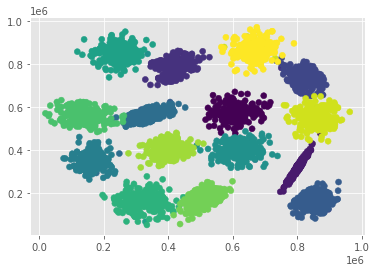

In [2]:
import pandas as pd
data = pd.read_csv('S1.txt',sep='\s+',header=None)
data = pd.DataFrame(data)

labels = pd.read_csv('S1-labels.pa',header=None)
labels = pd.DataFrame(labels)
labels = labels.drop([0,1,2,3,4])
labels[0] = labels[0].astype(int)
data[2] = labels

data[2].fillna(1,inplace=True)
import matplotlib.pyplot as plt
x = data[0]
y = data[1]
z = data[2]
#plt.plot(x, y,'r--')
plt.scatter(x, y, c=z)
plt.show()

In [3]:
data

,0,1,2
0,664159,550946,1.0
1,665845,557965,1.0
2,597173,575538,1.0
3,618600,551446,1.0
4,635690,608046,1.0
...,...,...,...
4995,665426,853940,15.0
4996,691827,863963,15.0
4997,650661,861267,15.0
4998,599647,858702,15.0


In [4]:
data.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [5]:
X_test=[599647,858702, 1]

In [6]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [7]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        # Find distace between a point in train vs test_row
        
        dist = euclidean_distance(test_row[:2], train_row[:2])
        # Add the train point with corresponding distace as a tuple to the list
        distances.append((train_row, dist))
    # Using python sort function to sort list of tuples
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [8]:
narr = data.to_numpy()

In [9]:
narr

array([[6.64159e+05, 5.50946e+05, 1.00000e+00],
       [6.65845e+05, 5.57965e+05, 1.00000e+00],
       [5.97173e+05, 5.75538e+05, 1.00000e+00],
       ...,
       [6.50661e+05, 8.61267e+05, 1.50000e+01],
       [5.99647e+05, 8.58702e+05, 1.50000e+01],
       [6.84091e+05, 8.42566e+05, 1.50000e+01]])

In [10]:
X_test

[599647, 858702, 1]

In [11]:
neighbors = get_neighbors(narr, X_test, 15)
neighbors

[array([5.99647e+05, 8.58702e+05, 1.50000e+01]),
 array([5.99612e+05, 8.59210e+05, 1.50000e+01]),
 array([5.99766e+05, 4.09755e+05, 8.00000e+00]),
 array([5.99808e+05, 5.96484e+05, 1.00000e+00]),
 array([5.9987e+05, 5.9111e+05, 1.0000e+00]),
 array([6.00007e+05, 3.77908e+05, 8.00000e+00]),
 array([6.00032e+05, 5.75310e+05, 1.00000e+00]),
 array([6.00039e+05, 5.57139e+05, 1.00000e+00]),
 array([5.99215e+05, 3.91457e+05, 8.00000e+00]),
 array([6.00114e+05, 4.13216e+05, 8.00000e+00]),
 array([6.00117e+05, 5.39079e+05, 1.00000e+00]),
 array([5.99123e+05, 6.16977e+05, 1.00000e+00]),
 array([6.00202e+05, 6.22079e+05, 1.00000e+00]),
 array([5.98908e+05, 2.54032e+05, 1.20000e+01]),
 array([5.98759e+05, 5.82942e+05, 1.00000e+00])]

In [12]:
output_values = [row[-1] for row in neighbors]
output_values

[15.0, 15.0, 8.0, 1.0, 1.0, 8.0, 1.0, 1.0, 8.0, 8.0, 1.0, 1.0, 1.0, 12.0, 1.0]

In [13]:
prediction = max(set(output_values), key=output_values.count)
prediction

1.0

In [14]:
X = data.iloc[:, :2] 
Y = data.iloc[:, 2]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
from sklearn import metrics
k_range = range(1,15)
scores = {}
score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    score_list.append(metrics.accuracy_score(y_test, y_pred))

In [18]:
scores

{1: 0.964,
 2: 0.954,
 3: 0.976,
 4: 0.976,
 5: 0.977,
 6: 0.977,
 7: 0.977,
 8: 0.977,
 9: 0.977,
 10: 0.977,
 11: 0.977,
 12: 0.977,
 13: 0.977,
 14: 0.977}

In [19]:
score_list

[0.964,
 0.954,
 0.976,
 0.976,
 0.977,
 0.977,
 0.977,
 0.977,
 0.977,
 0.977,
 0.977,
 0.977,
 0.977,
 0.977]

In [20]:
#Built in sklearn algorithm runs much faster than the from scratch algorithm. 
#Operations in the sklearn algorithm are computed on a dataframe rather than np array
#making the test set much easier to measure.

## Use S2.txt data file and plot the datapoints. Figure out the optimal clusters that can be formed and make clusters. Plot the datapoints and centroid.(Use both your own implementation and Sklearn's).

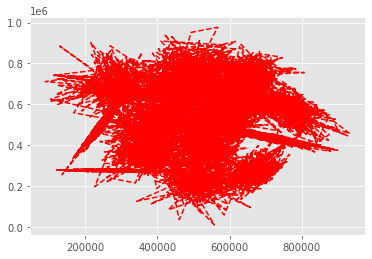

In [21]:
dataS2 = pd.read_csv('S2.txt',sep='\s+',header=None)
dataS2 = pd.DataFrame(dataS2)
x = dataS2[0]
y = dataS2[1]
plt.plot(x, y,'r--')
plt.show()

In [22]:
narr = dataS2.to_numpy()
X = narr


In [23]:
X

array([[624474, 837604],
       [673412, 735362],
       [647442, 677000],
       ...,
       [569266, 738385],
       [444587, 878830],
       [434041, 814466]], dtype=int64)

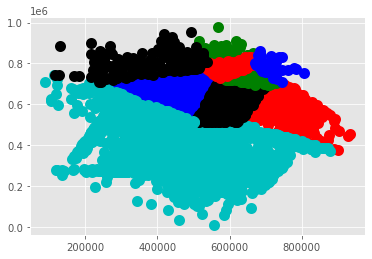

In [24]:
colors = 10*["g","r","c","b","k"]


class K_Means:
    def __init__(self, k=10, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):
        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            ## Finding the distances between each point and the centroids and then appending datapoints to the cluster of that centroid based on 
            ## minimum distance.
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            ## Update the new centroid as the average of the new centroids obtained from the new centroids and the previous centroid. 
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            ## Calculate the tolerance i.e difference between the centroids divide by the original centroid.
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
clf = K_Means()
clf.fit(X)

## Plotting the points and the centroids.
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="*", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="o", color=color, linewidths=5)
plt.show()

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

centroids = kmeans.cluster_centers_
print(centroids)

[[294902.85362096 493324.89060092]
 [693427.21516755 606013.44268078]
 [660969.97413793 266558.63218391]
 [506980.9695122  225214.53658537]
 [478579.6957265  607044.45811966]
 [300782.2208589  704512.31901841]
 [317189.00825082 305524.39108911]
 [530802.2972973  424324.37297297]
 [567555.54251701 764267.4829932 ]
 [749016.08035714 447152.53794643]]


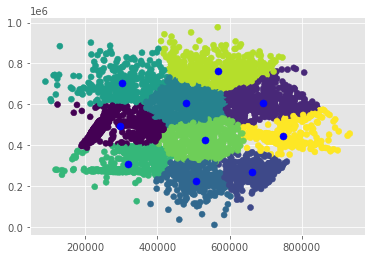

In [26]:
plt.scatter(x,y, c = kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=50)
plt.show()

In [27]:
#Built in sklearn algorithm runs much faster than the from scratch algorithm. 
#k means from sklearn also has more accurate boundry lines of clusters
#both cluster sets above are judged by k = 10 which shows how effective sklearn kmeans is.